In [1]:
import geopandas as gpd 
import os
from glob import glob
from tqdm.auto import tqdm
import pandas as pd

# LANDUSE
## 강원도 landuse shp 파일을 다운받아서 하나의 shp로 병합
http://openapi.nsdi.go.kr/nsdi/eios/ServiceDetail.do?svcSe=F&svcId=F024

1) 카테고리화해서 shp로 병합 <br>
2) QGIS에서 좌표계 ESPG:5174->ESPG:4326으로 변환<br>
3) shp를 tif로 래스터 변환<br>
4) 변환된 tif에 지정한 범주에 맞는 색상 선택 후 export

In [4]:
files=glob(f"LANDUSE/*.shp")
len(files)

18

In [5]:
df_files=[]
for i in tqdm(range(len(files))):
    gdf = gpd.read_file(files[i],encoding='cp949')
    gdf=gdf[['A14','geometry']]
    df_files.append(gdf)

  0%|          | 0/18 [00:00<?, ?it/s]

In [112]:
data=pd.concat(df_files,axis=0)

In [113]:
data.reset_index(drop=True,inplace=True)

In [114]:
data.info(verbose=True,null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2712107 entries, 0 to 2712106
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   A14       2682615 non-null  object  
 1   geometry  2712107 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 41.4+ MB


C:\Users\EBDL\AppData\Local\Temp\ipykernel_7264\3406332632.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True,null_counts=True)


In [115]:
data['A14']=data['A14'].fillna('기타')

In [116]:
data['A14'].unique()

array(['기타', '제1종일반주거지역', '제2종일반주거지역', '제3종일반주거지역', '자연녹지지역', '일반상업지역',
       '준주거지역', '보전녹지지역', '일반공업지역', '생산녹지지역', '자연환경보전지역', '농림지역',
       '보전관리지역', '생산관리지역', '계획관리지역', '준공업지역', '관리지역', '제1종전용주거지역',
       '용도미지정', '제2종전용주거지역', '근린상업지역', '중심상업지역', '전용공업지역'], dtype=object)

데이터 범주화

In [117]:
category_groups = {  
    '2': ['일반상업지역', '근린상업지역', '중심상업지역'],                             #Commercial
    '4': ['기타', '용도미지정','계획관리지역', '관리지역'],                            #Miscellaneous
    '6': ['일반공업지역', '준공업지역', '전용공업지역','생산관리지역','생산녹지지역'], #Industrial
    '8' : ['농림지역'],                                                                #Agriculuture
    '10': ['제1종일반주거지역', '제2종일반주거지역', '제3종일반주거지역',              #Residential
                    '준주거지역', '제1종전용주거지역','제2종전용주거지역'], 
    '12': ['자연녹지지역', '보전녹지지역', '자연환경보전지역','보전관리지역']          #Green Area
}

# Classify the land use categories into groups
data['Category'] = data['A14'].map(
    lambda x: next((group for group, categories in category_groups.items() if x in categories), None)
)

# Print the classified land use categories
data

,A14,geometry,Category
0,기타,"POLYGON ((264203.565 487113.303, 264203.636 48...",4
1,제1종일반주거지역,"POLYGON ((264341.165 487216.002, 264334.958 48...",10
2,제1종일반주거지역,"POLYGON ((264340.523 487215.118, 264345.768 48...",10
3,제1종일반주거지역,"POLYGON ((264379.362 487220.565, 264381.098 48...",10
4,제1종일반주거지역,"POLYGON ((264387.304 487240.828, 264403.708 48...",10
...,...,...,...
2712102,농림지역,"POLYGON ((336290.651 513901.719, 336238.981 51...",8
2712103,농림지역,"POLYGON ((336210.017 513725.996, 336183.242 51...",8
2712104,농림지역,"POLYGON ((335980.437 513666.087, 336064.825 51...",8
2712105,농림지역,"POLYGON ((335948.003 514121.828, 336123.096 51...",8


In [118]:
data['Category'] = data['Category'].astype('int')

In [119]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2712107 entries, 0 to 2712106
Data columns (total 3 columns):
 #   Column    Dtype   
---  ------    -----   
 0   A14       object  
 1   geometry  geometry
 2   Category  int32   
dtypes: geometry(1), int32(1), object(1)
memory usage: 51.7+ MB


In [120]:
data.drop(['A14'],axis=1,inplace=True)

In [121]:
data['Category'].unique()

array([ 4, 10, 12,  2,  6,  8])

In [122]:
data

,geometry,Category
0,"POLYGON ((264203.565 487113.303, 264203.636 48...",4
1,"POLYGON ((264341.165 487216.002, 264334.958 48...",10
2,"POLYGON ((264340.523 487215.118, 264345.768 48...",10
3,"POLYGON ((264379.362 487220.565, 264381.098 48...",10
4,"POLYGON ((264387.304 487240.828, 264403.708 48...",10
...,...,...
2712102,"POLYGON ((336290.651 513901.719, 336238.981 51...",8
2712103,"POLYGON ((336210.017 513725.996, 336183.242 51...",8
2712104,"POLYGON ((335980.437 513666.087, 336064.825 51...",8
2712105,"POLYGON ((335948.003 514121.828, 336123.096 51...",8


In [93]:
# shp로 만들기
data.to_file(f'land_use_농업/land_use.shp')

# Population Density
## 강원도의 읍면동 단위면적당 인구밀도 데이터
- 스케일 : 읍면동
- 데이터 처리 과정<br><br>
1) 강원도 shp 파일을 구한다.<br>
2) shp파일을 Qgis를 통해 면적을 구한다. (면적 데이터를 따로 구하면 법정동, 행정동이 달라서 없는 데이터나 같은 이름의 읍면동 때문에 문제가 많음, Qgis로 구한 다음 따로 구한 면적 데이터랑 비교해봤을 때 큰 차이 없어서 사용 가능하다고 판단)<br>
3) 인구 데이터는 csv파일 형태로 따로 구함<br>
4) shp 파일 데이터에 면적하고 인구 데이터를 붙인 뒤 (나누기)계산을 통해 최종 인구밀도를 도출

위의 과정을 통해 얻은 shp파일을 <br>

1) QGIS에서 좌표계 ESPG:5174->ESPG:4326으로 변환<br>
2) shp를 tif로 래스터 변환<br>
3) 변환된 tif에 지정한 범주에 맞는 색상 선택 후 export

In [145]:
gdf = gpd.read_file("PopulationDensity/gdf_population_density.shp")
gdf = gdf[['pop_densit','geometry']]

PD = gdf
PD.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_densit  303 non-null    float64 
 1   geometry    303 non-null    geometry
dtypes: float64(1), geometry(1)
memory usage: 4.9 KB


In [146]:
PD[PD['pop_densit']==-1]

,pop_densit,geometry
126,-1.0,"MULTIPOLYGON (((1072944.893 2053359.718, 10730..."
167,-1.0,"MULTIPOLYGON (((1030227.463 2032523.737, 10302..."
168,-1.0,"MULTIPOLYGON (((1007691.059 2037409.027, 10077..."
174,-1.0,"MULTIPOLYGON (((1022736.461 2035770.075, 10227..."
175,-1.0,"MULTIPOLYGON (((1006366.752 2036807.068, 10064..."


In [147]:
PD.loc[PD['pop_densit'] == -1, 'pop_densit'] = 0

In [148]:
PD.describe()

,pop_densit
count,303.000000
mean,1479.793076
std,2905.115176
min,0.000000
25%,5.774425
50%,82.222841
75%,1652.209783
max,18645.328160


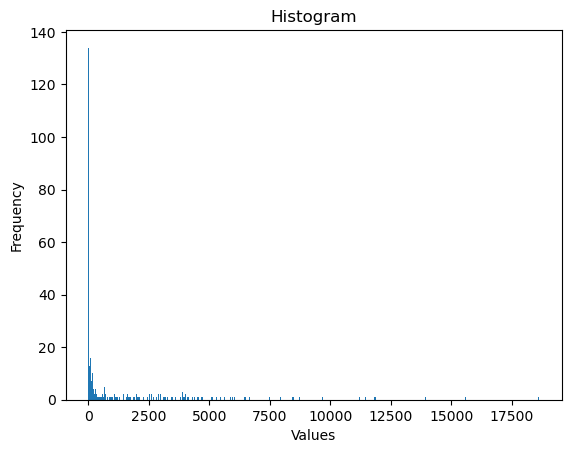

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
PD['pop_densit'].plot(kind='hist',bins=500)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [151]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column' is the column you want to divid,e
range_boundaries = [0,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,200,300,400 ,500,1000, 2000,3000, 4000,5000,6000,7000, 8000,9000,10000,11000,12000,13000,14000,15000, 16000, 20000]  # Specify your custom range boundaries

# Classify the data into steps 1 to 10 based on the specified range boundaries
PD['Classification'] = pd.cut(PD['pop_densit'], bins=range_boundaries, labels=range(1, len(range_boundaries)), include_lowest=True)

# Print the updated DataFrame
PD


,pop_densit,geometry,Classification
0,2.185509,"POLYGON ((1095074.004 1981465.488, 1095106.327...",3
1,88.742339,"POLYGON ((1102134.624 1986567.931, 1102213.221...",14
2,3882.907732,"POLYGON ((1093450.375 2023846.119, 1093459.933...",23
3,1445.527086,"POLYGON ((1092814.471 2023246.085, 1092814.626...",21
4,5124.253516,"MULTIPOLYGON (((1095983.388 2024237.232, 10959...",25
...,...,...,...
298,588.521536,"POLYGON ((1131307.678 1914108.259, 1131461.005...",20
299,2.775556,"POLYGON ((1136091.118 1946851.693, 1136045.165...",3
300,2.917654,"POLYGON ((1134280.296 1949907.946, 1134332.407...",3
301,11.231062,"POLYGON ((1131433.147 1944800.707, 1131360.042...",7


In [152]:
PD['Classification'].unique()

[3, 14, 23, 21, 25, ..., 10, 9, 36, 35, 33]
Length: 35
Categories (36, int64): [1 < 2 < 3 < 4 ... 33 < 34 < 35 < 36]

In [153]:
PD.drop(['pop_densit'],axis=1,inplace=True)

In [154]:
PD['Classification'] = PD['Classification'].astype('int')

In [155]:
PD

,geometry,Classification
0,"POLYGON ((1095074.004 1981465.488, 1095106.327...",3
1,"POLYGON ((1102134.624 1986567.931, 1102213.221...",14
2,"POLYGON ((1093450.375 2023846.119, 1093459.933...",23
3,"POLYGON ((1092814.471 2023246.085, 1092814.626...",21
4,"MULTIPOLYGON (((1095983.388 2024237.232, 10959...",25
...,...,...
298,"POLYGON ((1131307.678 1914108.259, 1131461.005...",20
299,"POLYGON ((1136091.118 1946851.693, 1136045.165...",3
300,"POLYGON ((1134280.296 1949907.946, 1134332.407...",3
301,"POLYGON ((1131433.147 1944800.707, 1131360.042...",7


In [157]:
PD.to_file(f'population_dense/population_density.shp')

C:\Users\EBDL\AppData\Local\Temp\ipykernel_7264\1767801115.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  PD.to_file(f'land_use_농업/landuse.shp')
